# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities_list = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) # come back and change this to 1500
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) # Come back and change this to 1500
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_list:
        cities_list.append(city)

# Print the city count to confirm sufficient count
len(cities_list)

weather_cities = pd.DataFrame(cities_list)
weather_cities.columns = ["city_column"] 
weather_cities.head()

,city_column
0,leningradskiy
1,sungairaya
2,ipixuna
3,chuy
4,punta arenas


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
lookup_city = "vao"
units = "imperial"
city_data = []


# Identify nearest city for each lat, lng combination
for city_api in cities_list:
    query_url = f"{url}appid={api_key}&q={city_api}&units={units}"
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        temperature = weather_json["main"]["temp_max"]
        cloudy = weather_json["clouds"]["all"]
        windspeed = weather_json["wind"]["speed"]
        humidity = weather_json["main"]["humidity"]
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        
        #  Appending a dictionary to the list 
        city_data.append({"City": city_api,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": temperature,
                         "Humidity": humidity,
                         "Cloudiness": cloudy,
                         "Wind Speed": windspeed,
                         "Country": country,
                         "Date": date})
        print(f"Temperature information found for city {city_api} and is city number {count}")
        count += 1
    except: 
        print("City not found. Skipping...")
        pass

Temperature information found for city leningradskiy and is city number 1
Temperature information found for city sungairaya and is city number 2
Temperature information found for city ipixuna and is city number 3
Temperature information found for city chuy and is city number 4
Temperature information found for city punta arenas and is city number 5
Temperature information found for city bredasdorp and is city number 6
Temperature information found for city lebu and is city number 7
Temperature information found for city verkhoyansk and is city number 8
Temperature information found for city bonthe and is city number 9
Temperature information found for city carnarvon and is city number 10
Temperature information found for city saint-philippe and is city number 11
Temperature information found for city rocha and is city number 12
Temperature information found for city coruripe and is city number 13
Temperature information found for city qasigiannguit and is city number 14
Temperature inf

Temperature information found for city urdoma and is city number 114
Temperature information found for city omboue and is city number 115
Temperature information found for city castro and is city number 116
Temperature information found for city hirara and is city number 117
City not found. Skipping...
Temperature information found for city bambous virieux and is city number 118
Temperature information found for city victoria and is city number 119
Temperature information found for city husavik and is city number 120
Temperature information found for city itoman and is city number 121
Temperature information found for city port hardy and is city number 122
Temperature information found for city vao and is city number 123
Temperature information found for city nkan and is city number 124
Temperature information found for city tuktoyaktuk and is city number 125
Temperature information found for city beoumi and is city number 126
Temperature information found for city talnakh and is city 

Temperature information found for city waingapu and is city number 226
Temperature information found for city east london and is city number 227
Temperature information found for city ziyang and is city number 228
Temperature information found for city koindu and is city number 229
Temperature information found for city byron bay and is city number 230
City not found. Skipping...
Temperature information found for city aberdeen and is city number 231
Temperature information found for city natchitoches and is city number 232
Temperature information found for city sorong and is city number 233
Temperature information found for city lodwar and is city number 234
City not found. Skipping...
Temperature information found for city baruun-urt and is city number 235
Temperature information found for city ostersund and is city number 236
Temperature information found for city vacaria and is city number 237
Temperature information found for city nyurba and is city number 238
Temperature informati

Temperature information found for city piranhas and is city number 338
Temperature information found for city ekibastuz and is city number 339
Temperature information found for city lompoc and is city number 340
Temperature information found for city yumen and is city number 341
Temperature information found for city fukue and is city number 342
Temperature information found for city cumpas and is city number 343
Temperature information found for city zhezkazgan and is city number 344
Temperature information found for city kenai and is city number 345
Temperature information found for city vardo and is city number 346
Temperature information found for city varena and is city number 347
Temperature information found for city lagoa and is city number 348
City not found. Skipping...
Temperature information found for city honiara and is city number 349
Temperature information found for city taltal and is city number 350
Temperature information found for city roxana and is city number 351
C

Temperature information found for city vasteras and is city number 450
Temperature information found for city port blair and is city number 451
Temperature information found for city mahibadhoo and is city number 452
Temperature information found for city terney and is city number 453
Temperature information found for city sedona and is city number 454
Temperature information found for city lebedinyy and is city number 455
Temperature information found for city goundam and is city number 456
Temperature information found for city verkhnevilyuysk and is city number 457
Temperature information found for city ternate and is city number 458
Temperature information found for city ambulu and is city number 459
Temperature information found for city banjar and is city number 460
City not found. Skipping...
Temperature information found for city nikolayevka and is city number 461
Temperature information found for city moerai and is city number 462
City not found. Skipping...
Temperature inform

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_df = pd.DataFrame(city_data)
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,leningradskiy,98,RU,1555866543,90,69.38,178.42,0.23,19.46
1,sungairaya,74,ID,1555866594,65,0.70,108.90,86.09,4.03
2,ipixuna,40,BR,1555866000,83,-1.76,-48.80,80.60,10.29
3,chuy,61,UY,1555866543,58,-33.69,-53.46,64.85,13.02
4,punta arenas,75,CL,1555866198,62,-53.16,-70.91,51.80,36.91


In [13]:
city_df.to_csv("city_data.csv", index=False, header=True)

In [14]:
city_data = "city_data.csv"

# Read the City and Ride Data
city_weather = pd.read_csv(city_data)
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,leningradskiy,98,RU,1555866543,90,69.38,178.42,0.23,19.46
1,sungairaya,74,ID,1555866594,65,0.70,108.90,86.09,4.03
2,ipixuna,40,BR,1555866000,83,-1.76,-48.80,80.60,10.29
3,chuy,61,UY,1555866543,58,-33.69,-53.46,64.85,13.02
4,punta arenas,75,CL,1555866198,62,-53.16,-70.91,51.80,36.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

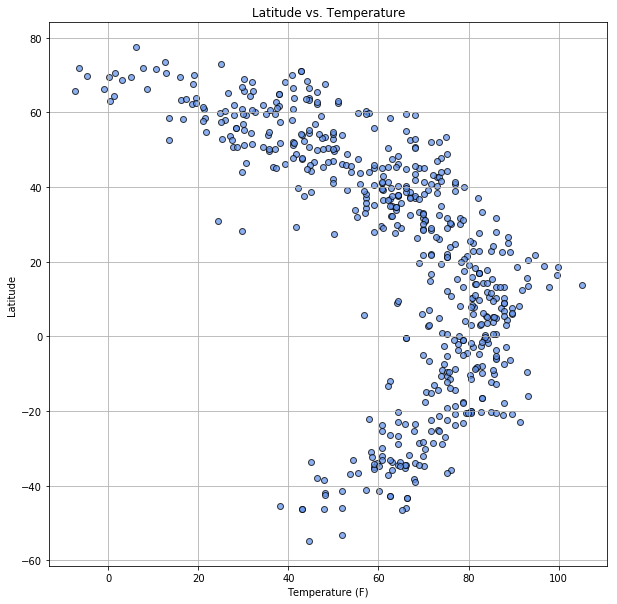

In [29]:
lat = city_weather.groupby(["City"]).sum()["Lat"]
temperature = city_weather.groupby(["City"]).sum()["Max Temp"]

plt.scatter(temperature, lat, marker="o", facecolors="cornflowerblue", edgecolors="black",
        alpha=.75, label='City')

plt.grid(True)
plt.title("Latitude vs. Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.gcf().set_size_inches((10, 10))
plt.savefig("Latitude vs. Temperature.png")

#### Latitude vs. Humidity Plot

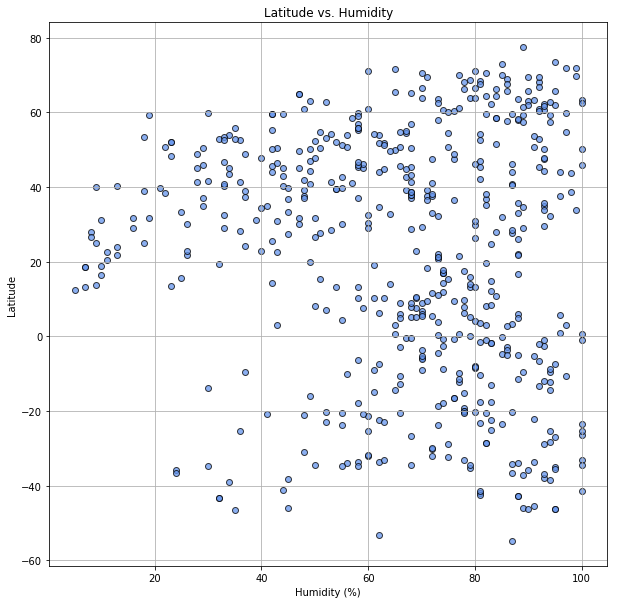

In [30]:
# edit_city_weather = city_weather.loc(["Humidity"] <=100,:)
lat = city_weather.groupby(["City"]).sum()["Lat"]
humidity = city_weather.groupby(["City"]).sum()["Humidity"]

plt.scatter(humidity, lat, marker="o", facecolors="cornflowerblue", edgecolors="black",
        alpha=.75, label='City')

plt.grid(True)
plt.title("Latitude vs. Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.gcf().set_size_inches((10, 10))
plt.savefig("Latitude vs. Humidity.png")

#### Latitude vs. Cloudiness Plot

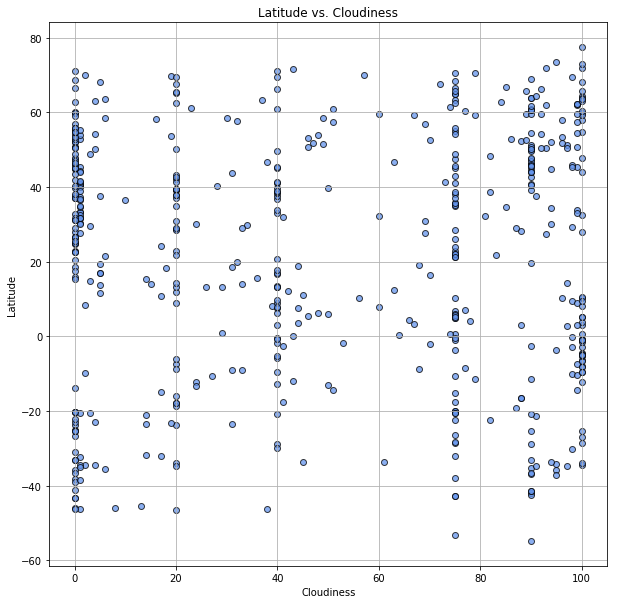

In [31]:
lat = city_weather.groupby(["City"]).sum()["Lat"]
cloudiness = city_weather.groupby(["City"]).sum()["Cloudiness"]

plt.scatter(cloudiness, lat, marker="o", facecolors="cornflowerblue", edgecolors="black",
        alpha=.75, label='City')

plt.grid(True)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.gcf().set_size_inches((10, 10))
plt.savefig("Latitude vs. Cloudiness.png")

#### Latitude vs. Wind Speed Plot

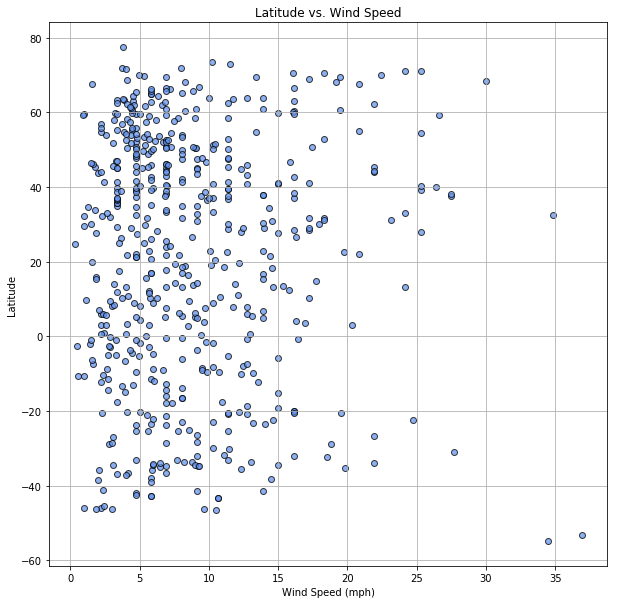

In [45]:
lat = city_weather.groupby(["City"]).sum()["Lat"]
wind_speed = city_weather.groupby(["City"]).sum()["Wind Speed"]

plt.scatter(wind_speed, lat, marker="o", facecolors="cornflowerblue", edgecolors="black",
        alpha=.75, label='City')

plt.grid(True)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.gcf().set_size_inches((10, 10))
plt.savefig("Latitude vs. Wind Speed.png")